In [1]:
import scipy.io as sio
import os
from hydromt_sfincs import SfincsModel
import matplotlib.pyplot as plt
import geopandas as gpd
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import pandas as pd
from shapely.geometry import LineString
import numpy as np
from TC_tracks_utils import track_points_to_linestring, select_TCs_by_AOI_intersect

In [2]:
# Filepath to data catalogs yml
cat_dir = r'Z:\Data-Expansion\users\lelise\data'
yml_base_CONUS = os.path.join(cat_dir, 'data_catalog_BASE_CONUS.yml')
yml_base_Carolinas = os.path.join(cat_dir, 'data_catalog_BASE_Carolinas.yml')
yml_sfincs_Carolinas = os.path.join(cat_dir, 'data_catalog_SFINCS_Carolinas.yml')

# Load in the SFINCS model
os.chdir(r'Z:\Data-Expansion\users\lelise\projects\Carolinas_SFINCS\Chapter1_FlorenceValidation\sfincs_models\mod_v4_flor')
model_root = r'ENC_200m_sbg5m_avgN_adv1_eff75'
mod = SfincsModel(model_root, mode='r', data_libs=[yml_base_CONUS, yml_base_Carolinas, yml_sfincs_Carolinas])

In [3]:
os.chdir(r'Z:\Data-Expansion\users\lelise\Chapter3\NCEP_Reanalysis\tracks')
f = 'UScoast6_AL_ncep_reanal_roEst1rmEst1_trk100'
tc_tracks = sio.loadmat(f'{f}.mat')
print(tc_tracks.keys())

tc_tracks_gdf = track_points_to_linestring(tc_tracks=tc_tracks, output_shpfile=None)#f'{fname}.shp')
print(tc_tracks_gdf.head(10))

dict_keys(['__header__', '__version__', '__globals__', 'T600store100', 'bearing100', 'day100', 'ds100', 'freq', 'hour100', 'lat100', 'lon100', 'month100', 'postore100', 'pstore100', 'rmw100', 'ro100', 'shear100', 'speed100', 'sqk', 'theta100', 'u850store100', 'uinc100', 'ut100', 'v850store100', 'vinc100', 'vstore100', 'vt100', 'year100'])
                                                geometry  tc_id
tc_id                                                          
1      LINESTRING (-84.069 18.952, -84.622 18.948, -8...      1
2      LINESTRING (-83.602 20.469, -83.666 20.979, -8...      2
3      LINESTRING (-74.115 22.222, -74.431 22.342, -7...      3
4      LINESTRING (-73.027 28.032, -73.413 28.439, -7...      4
5      LINESTRING (-80.196 18.043, -80.631 18.565, -8...      5
6      LINESTRING (-72.364 29.043, -72.8 29.154, -73....      6
7      LINESTRING (-85.706 21.055, -85.872 21.201, -8...      7
8      LINESTRING (-83.607 18.672, -83.775 18.944, -8...      8
9      LINESTRING (

In [4]:
# 200 KM BUFFER
buff = 200
aoi_buff, tc_tracks_gdf = select_TCs_by_AOI_intersect(aoi=mod.region, tc_tracks_gdf=tc_tracks_gdf, buffer_km=buff)
fname = f'{f}_{buff}km'
tc_tracks_sel = tc_tracks_gdf[tc_tracks_gdf['aoi_sel'] == True]
print(tc_tracks_sel.head(10))

tc_tracks_sel.to_csv(f'{fname}.csv', index=False)
print(f'Total of number of tracks selected: {len(tc_tracks_sel)}')

1623 of 5018 TC tracks intersect with the study area
                                                geometry  tc_id  aoi_sel
tc_id                                                                   
2      LINESTRING (-83.602 20.469, -83.666 20.979, -8...      2     True
3      LINESTRING (-74.115 22.222, -74.431 22.342, -7...      3     True
4      LINESTRING (-73.027 28.032, -73.413 28.439, -7...      4     True
6      LINESTRING (-72.364 29.043, -72.8 29.154, -73....      6     True
18     LINESTRING (-74.953 21.566, -75.527 21.895, -7...     18     True
19     LINESTRING (-86.73 20.349, -86.946 20.9, -87.1...     19     True
21     LINESTRING (-74.375 21.913, -74.99 22.03, -75....     21     True
28     LINESTRING (-86.923 25.345, -86.974 25.475, -8...     28     True
37     LINESTRING (-70.12 30.895, -70.825 31.458, -71...     37     True
45     LINESTRING (-72.755 28.566, -72.917 28.648, -7...     45     True
Total of number of tracks selected: 1623


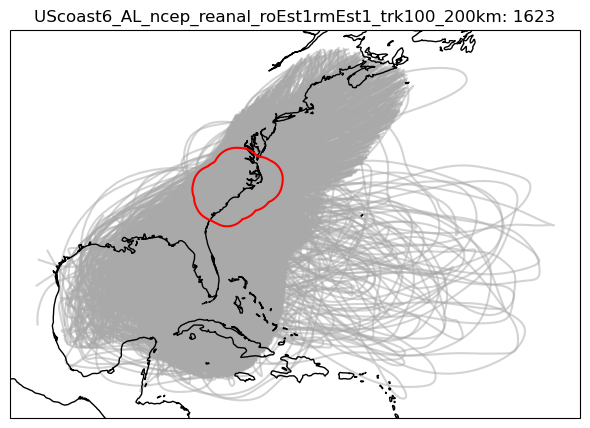

In [5]:
fig, ax = plt.subplots(tight_layout=True, figsize=(6, 4.5), subplot_kw={'projection': ccrs.PlateCarree()})
tc_tracks_sel.plot(ax=ax, alpha=0.5, color='darkgrey')
ax.add_feature(cfeature.COASTLINE, zorder=2)
aoi_buff.boundary.plot(ax=ax, color='red', zorder=2)
ax.set_title(f'{fname}: {len(tc_tracks_sel)}')
plt.savefig(f'{fname}.png')

In [6]:
# 15 KM BUFFER
buff = 15
fname = f'{f}_{buff}km'
aoi_buff, tc_tracks_gdf = select_TCs_by_AOI_intersect(aoi=mod.region, tc_tracks_gdf=tc_tracks_gdf, buffer_km=buff)
tc_tracks_sel = tc_tracks_gdf[tc_tracks_gdf['aoi_sel'] == True]
print(tc_tracks_sel.head(10))

tc_tracks_sel.to_csv(f'{fname}.csv', index=False)
print(f'Total of number of tracks selected: {len(tc_tracks_sel)}')

910 of 5018 TC tracks intersect with the study area
                                                geometry  tc_id  aoi_sel
tc_id                                                                   
4      LINESTRING (-73.027 28.032, -73.413 28.439, -7...      4     True
18     LINESTRING (-74.953 21.566, -75.527 21.895, -7...     18     True
19     LINESTRING (-86.73 20.349, -86.946 20.9, -87.1...     19     True
28     LINESTRING (-86.923 25.345, -86.974 25.475, -8...     28     True
37     LINESTRING (-70.12 30.895, -70.825 31.458, -71...     37     True
52     LINESTRING (-92.924 24.03, -92.641 24.484, -92...     52     True
77     LINESTRING (-71.532 29.508, -72.261 29.89, -72...     77     True
83     LINESTRING (-78.863 26.33, -78.938 26.425, -79...     83     True
84     LINESTRING (-75.09 20.675, -75.337 20.825, -75...     84     True
86     LINESTRING (-71.919 29.11, -72.303 29.59, -72....     86     True
Total of number of tracks selected: 910


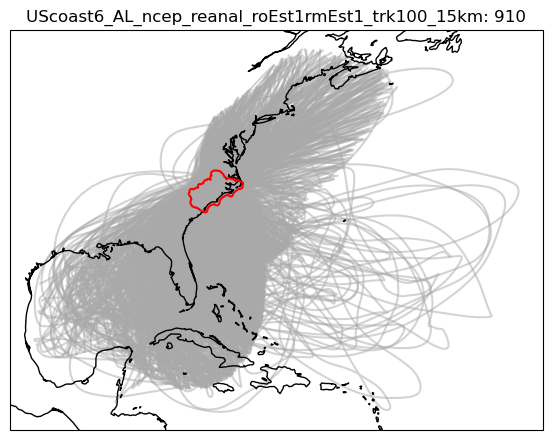

In [7]:
fig, ax = plt.subplots(tight_layout=True, figsize=(6, 4.5), subplot_kw={'projection': ccrs.PlateCarree()})
tc_tracks_sel.plot(ax=ax, alpha=0.5, color='darkgrey')
ax.add_feature(cfeature.COASTLINE, zorder=2)
aoi_buff.boundary.plot(ax=ax, color='red', zorder=2)
ax.set_title(f'{fname}: {len(tc_tracks_sel)}')
plt.savefig(f'{fname}.png')

In [8]:
# ADCIRC STORMS
adc_file = r'Z:\Data-Expansion\users\lelise\Chapter3\NCEP_Reanalysis\stormTide\stormTide_TCIDs_and_gageCounts.csv'
adc_d = pd.read_csv(adc_file)
print(adc_d)

fname = f'adcirc_modeled_TCs_all'
tc_tracks_sel = tc_tracks_gdf[tc_tracks_gdf.index.isin(adc_d['tc_id'])]
tc_tracks_adcirc = tc_tracks_sel
print(tc_tracks_sel.head(10))

tc_tracks_sel.to_csv(f'{fname}.csv', index=False)
print(f'Total of number of tracks selected: {len(tc_tracks_sel)}')

       tc_id  gage_counts
0        3.0            2
1        4.0           11
2        6.0            1
3       18.0           22
4       21.0            8
...      ...          ...
1307  5011.0           22
1308  5014.0           17
1309  5015.0           18
1310  5017.0            2
1311  5018.0            2

[1312 rows x 2 columns]
                                                geometry  tc_id  aoi_sel
tc_id                                                                   
3      LINESTRING (-74.115 22.222, -74.431 22.342, -7...      3    False
4      LINESTRING (-73.027 28.032, -73.413 28.439, -7...      4     True
6      LINESTRING (-72.364 29.043, -72.8 29.154, -73....      6    False
18     LINESTRING (-74.953 21.566, -75.527 21.895, -7...     18     True
21     LINESTRING (-74.375 21.913, -74.99 22.03, -75....     21    False
28     LINESTRING (-86.923 25.345, -86.974 25.475, -8...     28     True
37     LINESTRING (-70.12 30.895, -70.825 31.458, -71...     37     True
45    

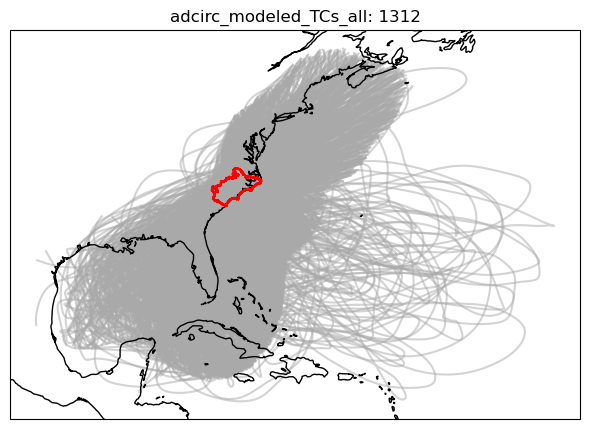

In [9]:
aoi = mod.region.boundary.to_crs(4326)
fig, ax = plt.subplots(tight_layout=True, figsize=(6, 4.5), subplot_kw={'projection': ccrs.PlateCarree()})
tc_tracks_sel.plot(ax=ax, alpha=0.5, color='darkgrey')
ax.add_feature(cfeature.COASTLINE, zorder=2)
aoi.plot(ax=ax, color='red', zorder=2)
ax.set_title(f'{fname}: {len(tc_tracks_sel)}')
plt.savefig(f'{fname}.png')

In [10]:
fname = f'adcirc_modeled_TCs_surgeAllGages'
adc_d_sub = adc_d[adc_d['gage_counts'] == 22]
print(adc_d_sub)

tc_tracks_sel = tc_tracks_gdf[tc_tracks_gdf.index.isin(adc_d_sub['tc_id'])]
print(tc_tracks_sel.head(10))

tc_tracks_sel.to_csv(f'{fname}.csv', index=False)
print(f'Total of number of tracks selected: {len(tc_tracks_sel)}')

       tc_id  gage_counts
3       18.0           22
11      83.0           22
12      84.0           22
33     158.0           22
39     182.0           22
...      ...          ...
1299  4985.0           22
1300  4989.0           22
1303  5002.0           22
1305  5009.0           22
1307  5011.0           22

[363 rows x 2 columns]
                                                geometry  tc_id  aoi_sel
tc_id                                                                   
18     LINESTRING (-74.953 21.566, -75.527 21.895, -7...     18     True
83     LINESTRING (-78.863 26.33, -78.938 26.425, -79...     83     True
84     LINESTRING (-75.09 20.675, -75.337 20.825, -75...     84     True
158    LINESTRING (-73.257 25.651, -73.496 25.841, -7...    158     True
182    LINESTRING (-73.212 24.516, -73.376 24.512, -7...    182     True
197    LINESTRING (-92.862 23.994, -93.026 24.256, -9...    197     True
198    LINESTRING (-73.335 25.362, -73.929 25.951, -7...    198     True
219    

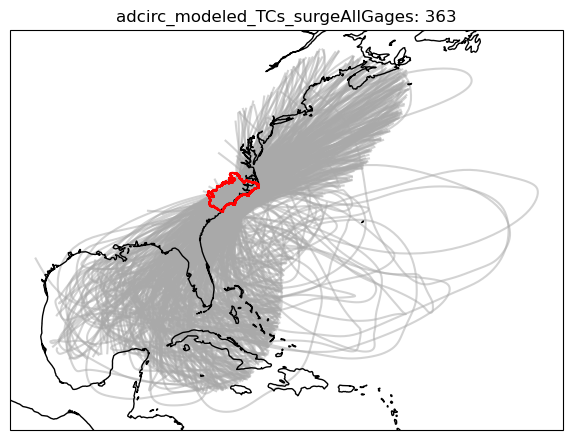

In [11]:
fig, ax = plt.subplots(tight_layout=True, figsize=(6, 4.5), subplot_kw={'projection': ccrs.PlateCarree()})
tc_tracks_sel.plot(ax=ax, alpha=0.5, color='darkgrey')
ax.add_feature(cfeature.COASTLINE, zorder=2)
aoi.plot(ax=ax, color='red', zorder=2)
ax.set_title(f'{fname}: {len(tc_tracks_sel)}')
plt.savefig(f'{fname}.png')

In [16]:
adcirc_tcs = pd.read_csv('adcirc_modeled_TCs_all.csv')
buffer_200km_tcs = pd.read_csv('UScoast6_AL_ncep_reanal_roEst1rmEst1_trk100_200km.csv')

# What TCs generated storm surge and DO go within 200km of the study area
common_tcs = adcirc_tcs[adcirc_tcs['tc_id'].isin(buffer_200km_tcs['tc_id'])]
print(f'{len(common_tcs)} of the ADCIRC TCs are also within the 200km buffer.')

1310 of the ADCIRC TCs are also within the 200km buffer.


2 of the ADCIRC TCs that are not within the 200km buffer.


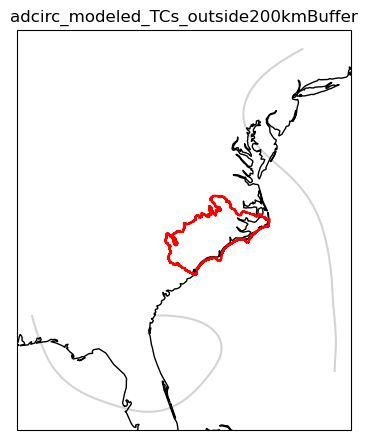

In [17]:
# What TCs generated storm surge and DO NOT go within 200km of the study area

far_tcs = adcirc_tcs[~adcirc_tcs['tc_id'].isin(buffer_200km_tcs['tc_id'])]
far_tcs.to_csv('adcirc_modeled_TCs_outside200kmBuffer.csv', index=False)
print(f'{len(far_tcs)} of the ADCIRC TCs that are not within the 200km buffer.')

tc_tracks_sel = tc_tracks_gdf[tc_tracks_gdf.index.isin(far_tcs['tc_id'])]
fig, ax = plt.subplots(tight_layout=True, figsize=(6, 4.5), subplot_kw={'projection': ccrs.PlateCarree()})
tc_tracks_sel.plot(ax=ax, alpha=0.5, color='darkgrey')
ax.add_feature(cfeature.COASTLINE, zorder=2)
aoi.plot(ax=ax, color='red', zorder=2)
ax.set_title(f'adcirc_modeled_TCs_outside200kmBuffer')
plt.savefig(f'adcirc_modeled_TCs_outside200kmBuffer.png')

313 of the TCs that are within the 200km buffer, do not generate surge.


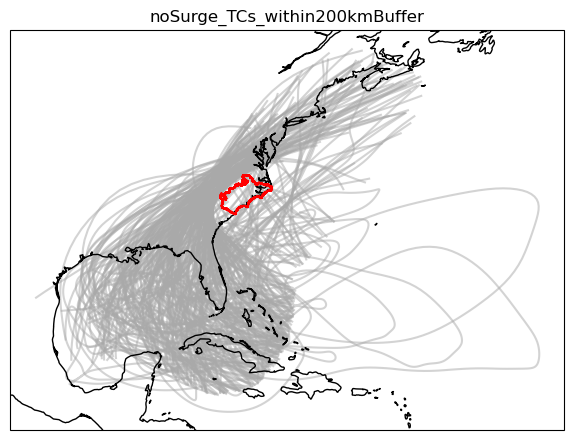

In [18]:
# What TCs DO overlap go within 200km of the study area but do not generate surge

no_surge_tcs = buffer_200km_tcs[~buffer_200km_tcs['tc_id'].isin(adcirc_tcs['tc_id'])]
no_surge_tcs.to_csv('noSurge_TCs_within200kmBuffer.csv', index=False)
print(f'{len(no_surge_tcs)} of the TCs that are within the 200km buffer, do not generate surge.')

tc_tracks_sel = tc_tracks_gdf[tc_tracks_gdf.index.isin(no_surge_tcs['tc_id'])]
fig, ax = plt.subplots(tight_layout=True, figsize=(6, 4.5), subplot_kw={'projection': ccrs.PlateCarree()})
tc_tracks_sel.plot(ax=ax, alpha=0.5, color='darkgrey')
ax.add_feature(cfeature.COASTLINE, zorder=2)
aoi.plot(ax=ax, color='red', zorder=2)
ax.set_title(f'noSurge_TCs_within200kmBuffer')
plt.savefig(f'noSurge_TCs_within200kmBuffer.png')